### ***LIBRERIAS***

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import requests
import smtplib  


### ***FASE I: ENTENDIMIENTO DEL PROBLEMA***

Se requiere realizar un breve analisis en base a encuestas realizadas sobre diferentes perfiles tanto para PEOPLE como para RECIUTERS/HEADHUNTERS y asi poder entender un poco mas sobre el contexto y los insights acerca del por que no pueden realizar busquedas laborales efectivas.


### ***FASE II : EXTRACCION DE DATOS***

In [2]:
from google.colab import drive
import os
import pandas as pd
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Coderhouse - Data Scientist/DATA/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Coderhouse - Data Scientist/DATA


In [3]:
fullpath_people = '/content/drive/MyDrive/Coderhouse - Data Scientist/DATA/Encuestas_People.xlsx'
df_Encuestas_People = pd.read_excel(fullpath_people)

fullpath_rrhh = '/content/drive/MyDrive/Coderhouse - Data Scientist/DATA/Encuestas_RRHH.xlsx'
df_Encuestas_RRHH = pd.read_excel(fullpath_rrhh)

In [4]:
df_Encuestas_People.head(10)

,Edad,Rango etario,Profesion,Genero,Formacion,Estado de animo,Sensacion frente a una busqueda,Situacion personal,Contexto socio economico,Limitantes percibidas,Seguridad sobre la posicion,Conocimiento del salario de la posicion
0,22,20's,Desempleado,Masculino,Secundario,Regular,Muy inseguro,Muy mala,medio,nivel de estudios alcanzados,me da miedo no saber lo suficiente,no
1,45,40's,IT,Femenino,Universitario Incompleto,Bueno,Regular,Mala,alto,capacidades diferentes,medianamente confiado,tengo una vaga nocion
2,31,30's,Administrativo,Femenino,Universitario Incompleto,Bueno,Muy inseguro,Muy mala,alto,genero,medianamente confiado,tengo una vaga nocion
3,28,20's,Desempleado,Masculino,Cursos,Muy bajo,Inseguro,Muy mala,medio,capacidades diferentes,me da miedo no saber lo suficiente,no
4,53,50's,Emprendedor,Femenino,Universitario completo,Bueno,Muy Seguro,Buena,alto,otros,muy confiado,Si
5,18,sub 20's,Desempleado,Masculino,Secundario,Regular,Muy inseguro,Muy mala,precario,nivel de estudios alcanzados,me da miedo no saber lo suficiente,no
6,36,30's,Administrativo,Femenino,Cursos,Bueno,Muy Seguro,Buena,medio,otros,muy confiado,si
7,35,30's,Desempleado,Masculino,Universitario completo,Muy bajo,Muy inseguro,Muy mala,medio,factores psicologicos,me da miedo no saber lo suficiente,no
8,27,20's,Emprendedor,Femenino,Universitario Incompleto,Bueno,Regular,Buena,bajo,situacion socio economica,muy confiado,si
9,19,sub 20's,Desempleado,Masculino,Secundario,Bajo,Regular,Regular,medio,factores psicologicos,me da miedo no saber lo suficiente,no


In [5]:
df_Encuestas_RRHH.head(10)

,Edad,Genero,Profesion,Formacion,Objetividad,Felling con cultura empresarial,Empatia,Inclusion,Salarios,Valoracion educativa,Beneficios
0,26,Femenino,Psicologia,Universitario en curso,Skills interpersonales,Regular,Abogo por hacer sentir comodo al candidato (Es...,"Me es indistinto, soy muy objetivo",Que proponga el candidato,Conjuncion de todas,Conjunción de todas
1,26,Femenino,Recuiter,Universitario completo,Mix,Mala,No empatizo con los candidatos,Descarto candidatos con capacidades especiales,Llegamos a un acuerdo mutuo para establecer un...,Cursos/Idioma,Salario en USD
2,27,Masculino,Psicologia,Universitario en curso,Skills interpersonales,Regular,Abogo por hacer sentir comodo al candidato (Es...,"Me es indistinto, soy muy objetivo",Que proponga el candidato,Conjuncion de todas,Conjunción de todas
3,33,Femenino,Recuiter,Universitario completo,Mix,Buena,Depende de la persona,Descarto candidatos con capacidades especiales,Llegamos a un acuerdo mutuo para establecer un...,Experiencia,Salario en USD
4,24,Masculino,Recuiter,Universitario en curso,Mix,Mala,Depende de la persona,Analizo el cargo a desempeñar en funcion del g...,Llegamos a un acuerdo mutuo para establecer un...,Cursos/Idioma,Descuentos varios
5,45,Masculino,Headhunter,Universitario completo,Skills tecnicos,Buena,Depende de la persona,Analizo el cargo a desempeñar en funcion del g...,Propongo el valor de la propuesta,Universitario,Salario competitivo
6,34,Femenino,Headhunter,Universitario completo,Skills tecnicos,Buena,No empatizo con los candidatos,Descarto candidatos con capacidades especiales,Propongo el valor de la propuesta,Conjuncion de todas,Salario competitivo
7,41,Masculino,Psicologia,Universitario completo,Skills interpersonales,Regular,Abogo por hacer sentir comodo al candidato (Es...,"Me es indistinto, soy muy objetivo",Que proponga el candidato,Conjuncion de todas,Conjunción de todas
8,38,Masculino,Recuiter,Universitario completo,Mix,Regular,No empatizo con los candidatos,Descarto candidatos con capacidades especiales,Llegamos a un acuerdo mutuo para establecer un...,Experiencia,Descuentos varios
9,27,Femenino,Psicologia,Universitario completo,Skills interpersonales,Regular,Abogo por hacer sentir comodo al candidato (Es...,"Me es indistinto, soy muy objetivo",Que proponga el candidato,Conjuncion de todas,Conjunción de todas


###**DATOS AGRUPADOS PEOPLE**

In [6]:
#Edad y profesion
df_RE_vs_P =  df_Encuestas_People.groupby(['Profesion','Rango etario'])['Edad'].count().reset_index(name='CantxEdad')  

#Edad y Formacion
df_RE_vs_F =  df_Encuestas_People.groupby(['Formacion','Rango etario'])['Edad'].count().reset_index(name='CantxFormacion')  

#Edad y Seguridad de la posición
df_RE_vs_SP =  df_Encuestas_People.groupby(['Seguridad sobre la posicion','Rango etario'])['Edad'].count().reset_index(name='CantxSP')  

#Edad y Conocimiento del salario de la posicion
df_RE_vs_CS =  df_Encuestas_People.groupby(['Conocimiento del salario de la posicion','Rango etario'])['Edad'].count().reset_index(name='CantxCS') 

#Genero y Formacion
df_G_vs_F =  df_Encuestas_People.groupby(['Genero','Formacion'])['Genero'].count().reset_index(name='CantxG')

#Genero y limitaciones percibidas
df_G_vs_LP =  df_Encuestas_People.groupby(['Genero','Limitantes percibidas'])['Genero'].count().reset_index(name='CantxLP')

#Estado de animo y situacion personal
df_EA_vs_SP =  df_Encuestas_People.groupby(['Estado de animo','Situacion personal'])['Situacion personal'].count().reset_index(name='CantxSiPe')

#Estado de animo y contexto socio economico
df_EA_vs_CSE = df_Encuestas_People.groupby(['Estado de animo','Contexto socio economico'])['Estado de animo'].count().reset_index(name='CantxCSE')

#Estado de animo y limitacioneds percibidas
df_EA_vs_LP = df_Encuestas_People.groupby(['Estado de animo','Limitantes percibidas'])['Estado de animo'].count().reset_index(name='CantxELP')

#Estado de animo y Seguridad sobre la posicion
df_EA_vs_P = df_Encuestas_People.groupby(['Estado de animo','Seguridad sobre la posicion'])['Estado de animo'].count().reset_index(name='CantxSPo')


### ***EDA PEOPLE***

QUE RELACIONES HAY ENTRE:
  1. Edad y profesion
  2. Edad y formacion
  3. Edad y seguridad sobre la posicion
  4. Edad y conocimiento de salario
  5. Genero y formacion
  6. Genero y limitantes percibidas
  7. Estado de animo y situacion personal
  8. Estado de animo y contexto socio economico
  9. Estado de animo y limitacioneds percibidas
  10. Estado de animo y Seguridad sobre la posicion


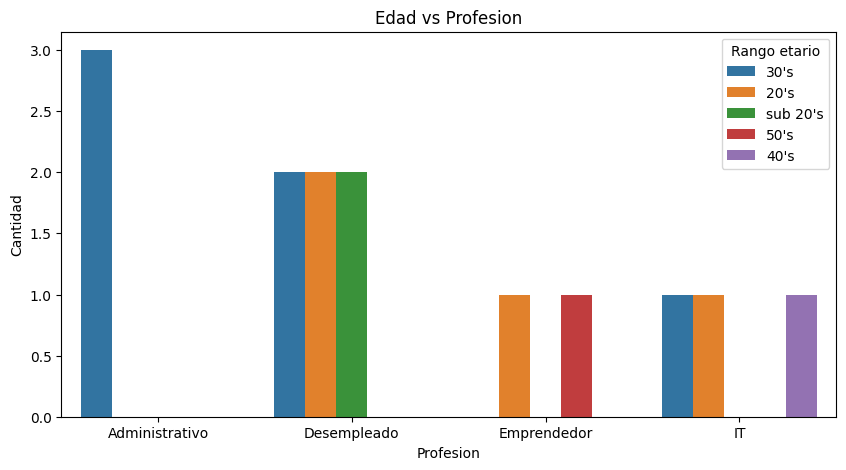

In [7]:
plt.figure(figsize = (10, 5))
a=sns.barplot(y = 'CantxEdad', x = 'Profesion', hue = 'Rango etario', data = df_RE_vs_P).set(xlabel ="Profesion", ylabel = "Cantidad",title="Edad vs Profesion")

**1er INSIGHT:** <br>
En un primer plano vemos que la situacion de desempleo no discrimina brechas generacionales. Encontramos que la gente de mas de 40 tiene en general posiciones solidas, mientras que la gente de 30 esta en un balance casi positivo respecto a la posibilidad de tener empleo. Con respecto a la gente de 20 hay un balance entre desempleo y empleabilidad, y directamente la gente sub 20 tiene un claro problema a la hora de insertarse laboralmente. Seguiremos analizando los por ques de casa situacion en funcion a las variables propuestas.

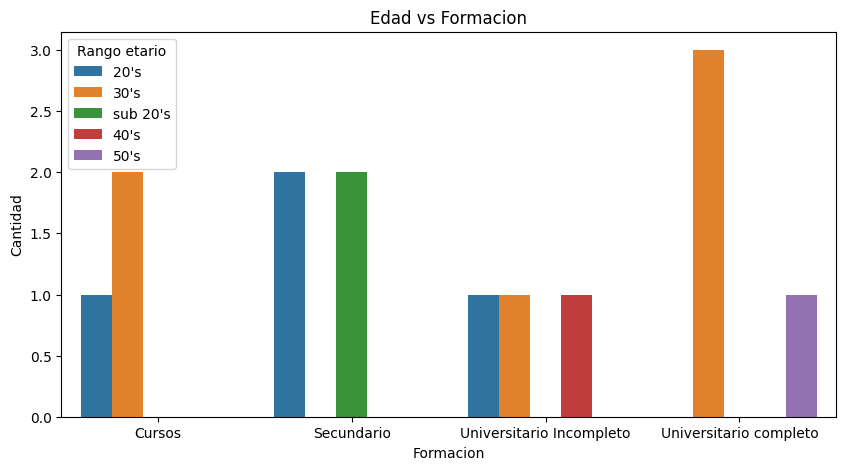

In [8]:
plt.figure(figsize = (10, 5))
a=sns.barplot(y = 'CantxFormacion', x = 'Formacion', hue = 'Rango etario', data = df_RE_vs_F).set(xlabel ="Formacion", ylabel = "Cantidad",title="Edad vs Formacion")

**2do INSIGHT:** <br>
Notamos una formación solida en gente mayor de 50, en una generación donde era mas exigente el conocimiento formal. Para la generación 40 segun la encuesta muchos tuvieron universitario incompleto, quiza por razones personales.
La generacion de los 30 es un poco mas diversa respecto a su formación, habria que analizar cada caso puntual para entender esa desición y diversificación. La generacion 20 y sub 20 recien empieza su recorrido profesional por lo que los valores de formación son los esperables mas que nada por estar en una etapa de auto descubrimiento vocacional.

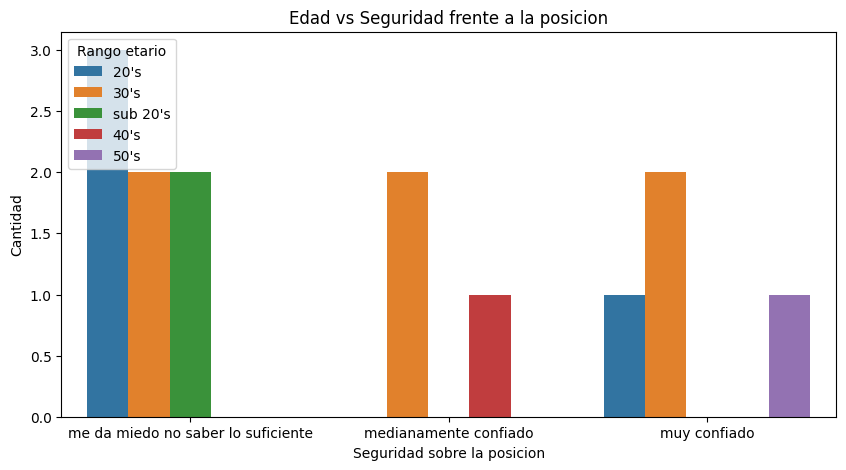

In [9]:
plt.figure(figsize = (10, 5))
a=sns.barplot(y = 'CantxSP', x = 'Seguridad sobre la posicion', hue = 'Rango etario', data = df_RE_vs_SP).set(xlabel ="Seguridad sobre la posicion", ylabel = "Cantidad",title="Edad vs Seguridad frente a la posicion")

**3er INSIGHT:** <br>
La gente mas joven maneja un nivel general de miedo, quiza pensando que no son aptos para cubrir dichas posiciones o por propia inseguridad de principiante. La gente de 30 es un poco mas inestable, quiza por formar parte de dos culturas laborales diferentes: la vieja escuela del jefe y la nueva del lider. Las generaciones mayores son las mas solidas respecto a confianza justamente por conocer las reglas del juego y tener mas experiencia.

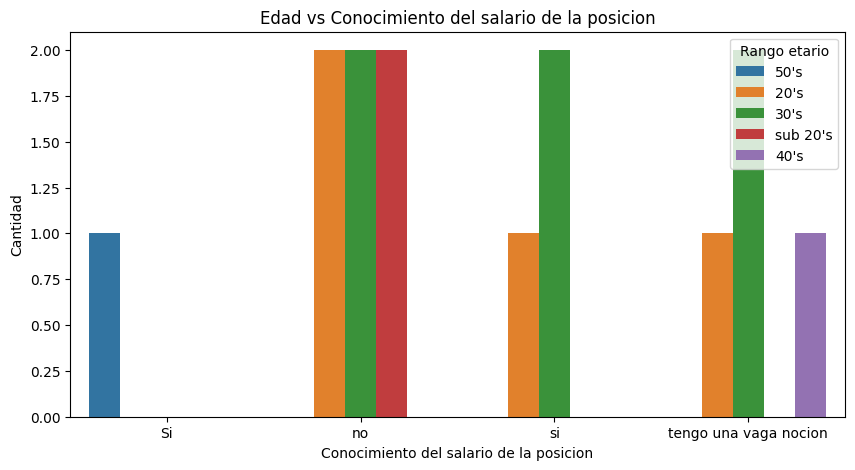

In [10]:
plt.figure(figsize = (10, 5))
a=sns.barplot(y = 'CantxCS', x = 'Conocimiento del salario de la posicion', hue = 'Rango etario', data = df_RE_vs_CS).set(xlabel ="Conocimiento del salario de la posicion", ylabel = "Cantidad",title="Edad vs Conocimiento del salario de la posicion")

**4to INSIGHT:**
La gente con mas edad y mas experiencia tiende a tener nociones o una idea real de cual deberia ser su salario. Seguramente este atado a su formación y a la manutención de un estilo de vida muy diferente al de alguien mas joven. No obstante es muy paralela la franja de gente entre menos de 20 y 30 años que no conoce cuanto deberia remunerarsed su posición. Quienes tienen nocion o conocen quiza es por el mismo factor: experiencia, comparación o mismo busqueda en portales como por ejemplo Glassdoor.

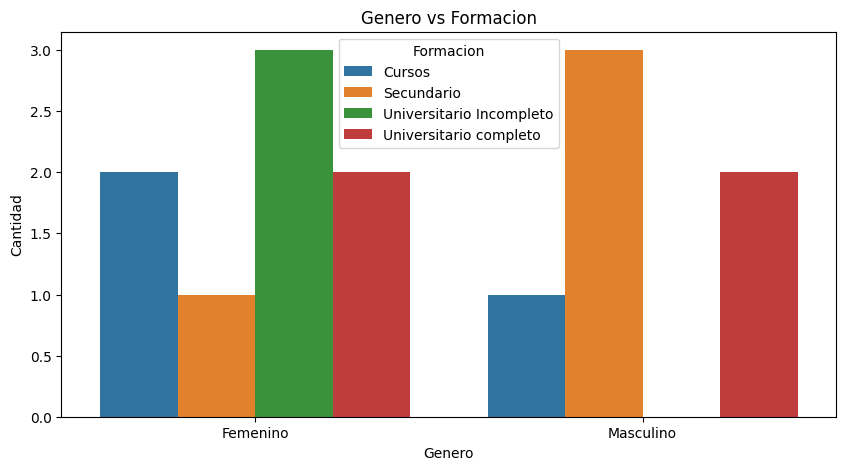

In [11]:
plt.figure(figsize = (10, 5))
a=sns.barplot(y = 'CantxG', x = 'Genero', hue = 'Formacion', data = df_G_vs_F).set(xlabel ="Genero", ylabel = "Cantidad",title="Genero vs Formacion")

**5to INSIGHT:** <br>
Notamos que el nivel educativo en el caso del genero femenino es mucho mas variado pero tambien mucho mas especializado. Quiza por factores de constancia o compromiso. Dejando de lado cuestiones ideologicas podemos comprobar que el genero no dice nada a la hora de entender si una persona es mas capaz que otra.

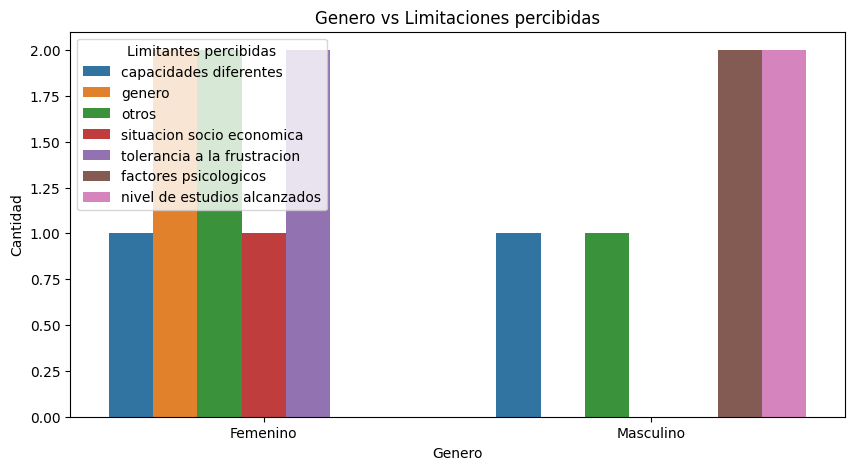

In [12]:
plt.figure(figsize = (10, 5))
a=sns.barplot(y = 'CantxLP', x = 'Genero', hue = 'Limitantes percibidas', data = df_G_vs_LP).set(xlabel ="Genero", ylabel = "Cantidad",title="Genero vs Limitaciones percibidas")

**6to INSIGHT:** <br>
Las limitacion tampoco conoce de generos. La encuesta fue muy breve el abanico de posibilidades para entender las limitantes que el otro considera importante a la hora de obtener un empleo puede ser amplia. Quiza lo que podemos remarcar en función al resultado arrojado de la encuensta es que la mujer es mas perceptiva y conciente de que limitantes le impone el mercado. No quiere decir que esto sea exacto, este insight no es definitorio ni mucho menos.

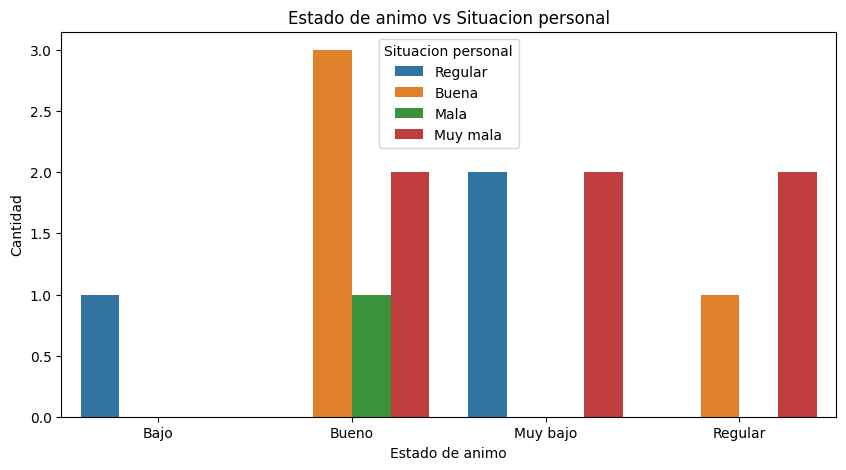

In [13]:
plt.figure(figsize = (10, 5))
a=sns.barplot(y = 'CantxSiPe', x = 'Estado de animo', hue = 'Situacion personal', data = df_EA_vs_SP).set(xlabel ="Estado de animo", ylabel = "Cantidad",title="Estado de animo vs Situacion personal")

**7mo INSIGHT:** <br>
Encontramos nuevamente un insight muy limitado, dado que somos personas y nuestra situación personal puede condicionar o no nuestro estado de animo. Siempre depende de la fortaleza de cada individuo. Ampliaremos un poco mas haciendo un mix con el contexto socio economico.

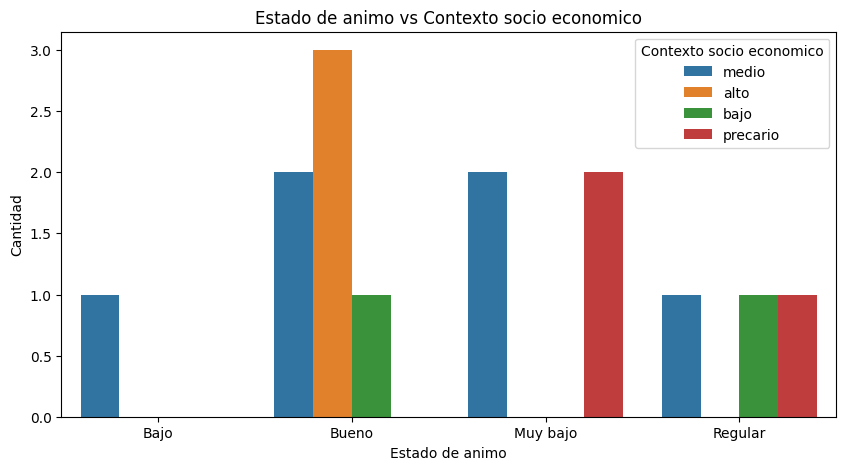

In [14]:
plt.figure(figsize = (10, 5))
a=sns.barplot(y = 'CantxCSE', x = 'Estado de animo', hue = 'Contexto socio economico', data = df_EA_vs_CSE).set(xlabel ="Estado de animo", ylabel = "Cantidad",title="Estado de animo vs Contexto socio economico")

**8vo INSIGHT:** <br>
Desglosando un poco mas el insight anterior parece casi una obviedad pero esta claro que cuando el contexto socio economico es mejor el estado de animo mejora, en relacion al resto del resto de los contextos. Profundizaremos en si hay alguna relacion con las limitaciones percibidas a la hora de encontrar empleo.

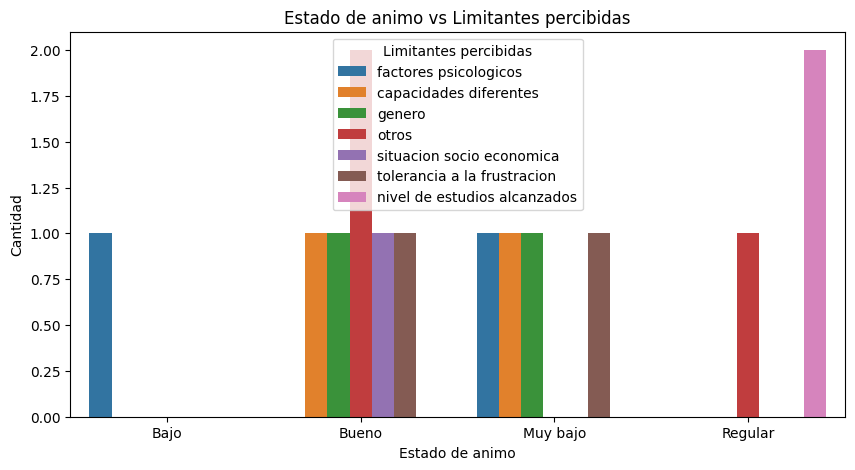

In [15]:
plt.figure(figsize = (10, 5))
a=sns.barplot(y = 'CantxELP', x = 'Estado de animo', hue = 'Limitantes percibidas', data = df_EA_vs_LP).set(xlabel ="Estado de animo", ylabel = "Cantidad",title="Estado de animo vs Limitantes percibidas")

**9no INSIGHT:**
Si bien las variables estan distribuidas es dcomun que quien tiene un estado de animo bueno tenga diferentes dificultades ya que la psique de cada persona es unica. Por otro lado un factor comun eds que la gente con animo bajo tenga algun tipo de problema a nivel psicologico y esto sea un impedimento para reflejar confianza a la hora de tener una entrevista. El entrevistador lo nota y no lo considera. Por eso es importante hacer focus group en nivelar las emociones y los estados de animo en funcion a conocer y dominar esas limitantes.

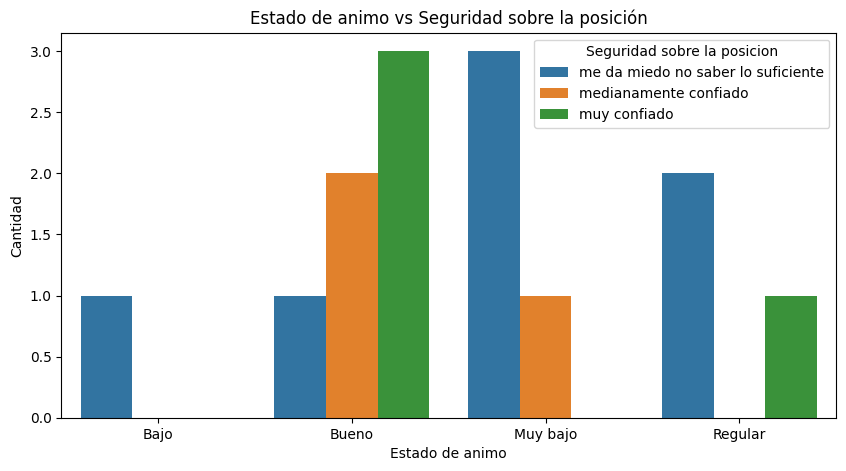

In [16]:
plt.figure(figsize = (10, 5))
a=sns.barplot(y = 'CantxSPo', x = 'Estado de animo', hue = 'Seguridad sobre la posicion', data = df_EA_vs_P).set(xlabel ="Estado de animo", ylabel = "Cantidad",title="Estado de animo vs Seguridad sobre la posición")

**10mo INSIGHT:** <br>
Aqui notamos el valor de la confianza por sobre el estado de animo. Se hace evidente que si estamos con un buen animo la confianza nace sola y genera resultados aun mas positivos frente a cualquier adversidad en la busqueda laboral.

###**DATOS AGRUPADOS RECUITERS/HEADHUNTERS**

In [17]:
#Profesion y formacion
df_RRHH_P_vs_F =  df_Encuestas_RRHH.groupby(['Profesion','Formacion'])['Formacion'].count().reset_index(name='CantxProf')  

#Profesion y felling con cultura empresarial
df_RRHH_P_vs_Fel =  df_Encuestas_RRHH.groupby(['Profesion','Felling con cultura empresarial'])['Felling con cultura empresarial'].count().reset_index(name='CantxFCEmp')  

#Profesion y empatia
df_RRHH_P_vs_E =  df_Encuestas_RRHH.groupby(['Profesion','Empatia'])['Empatia'].count().reset_index(name='CantxEmp')  

#Empatia e inclusion
df_RRHH_E_vs_I =  df_Encuestas_RRHH.groupby(['Empatia','Inclusion'])['Inclusion'].count().reset_index(name='CantxInc') 

#Inclusion y salarios
df_RRHH_I_vs_S =  df_Encuestas_RRHH.groupby(['Inclusion','Salarios'])['Salarios'].count().reset_index(name='CantxSal')

#Salarios y valoracion educativa
df_RRHH_S_vs_VE =  df_Encuestas_RRHH.groupby(['Salarios','Valoracion educativa'])['Valoracion educativa'].count().reset_index(name='CantxVEd')

#Profesion y beneficios
df_RRHH_P_vs_B =  df_Encuestas_RRHH.groupby(['Profesion','Beneficios'])['Beneficios'].count().reset_index(name='CantxBe')

#Profesion y objetividad
df_RRHH_P_vs_O = df_Encuestas_RRHH.groupby(['Profesion','Objetividad'])['Objetividad'].count().reset_index(name='CantxObj')

#Objetividad y empatia
df_RRHH_O_vs_E = df_Encuestas_RRHH.groupby(['Objetividad','Empatia'])['Empatia'].count().reset_index(name='CantxEmp')

#Objetividad e inclusion
df_RRHH_O_vs_I = df_Encuestas_RRHH.groupby(['Objetividad','Inclusion'])['Inclusion'].count().reset_index(name='CantxInc')

### ***EDA RECUITERS/HEADHUNTERS***

QUE RELACIONES HAY ENTRE:

  1. Profesion y formacion
  2. Profesion y felling con cultura empresarial
  3. Profesion y empatia
  4. Empatia e inclusion
  5. Inclusion y salarios
  6. Salarios y valoracion educativa
  7. Profesion y beneficios
  8. Profesion y objetividad
  9. Objetividad y empatia
  10. Objetividad e inclusion

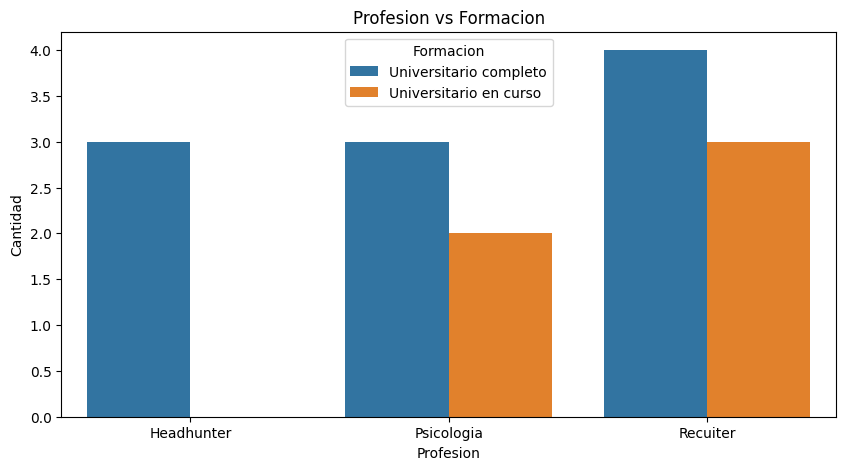

In [18]:
plt.figure(figsize = (10, 5))
a=sns.barplot(y = 'CantxProf', x = 'Profesion', hue = 'Formacion', data = df_RRHH_P_vs_F).set(xlabel ="Profesion", ylabel = "Cantidad",title="Profesion vs Formacion")

**1er INSIGHT:** <br>
Logramos determinar que los cargos jerarquicos superiores como los de un headhunter tiene una formación academica solida, mientras que posiciónes diferentes o de menor rango aun pueden experimentar en su mayoria tener su fomación completa en general, o en un menor medida no. Quiza nos oriente el termino de rangos de seniority en esta situación.

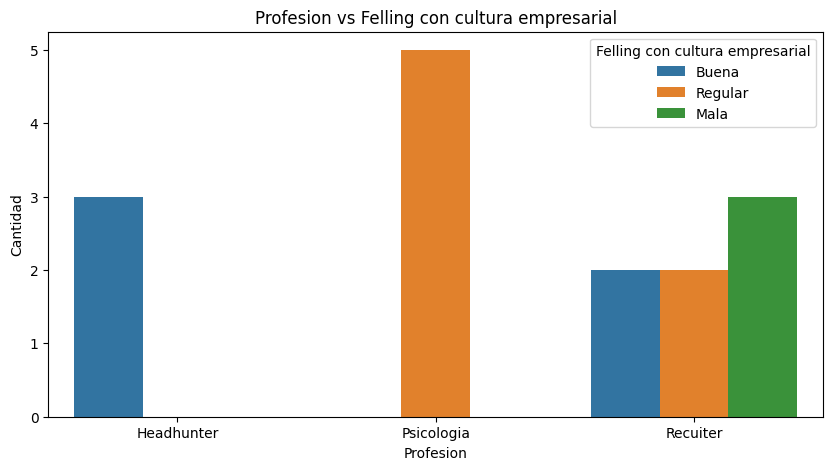

In [19]:
plt.figure(figsize = (10, 5))
a=sns.barplot(y = 'CantxFCEmp', x = 'Profesion', hue = 'Felling con cultura empresarial', data = df_RRHH_P_vs_Fel).set(xlabel ="Profesion", ylabel = "Cantidad",title="Profesion vs Felling con cultura empresarial")

**2do INSIGHT:** <br>
Los perfiles mas experimentados estan inmersos ya en el tema de cultura empresarial por lo cual no resulta descabellado que la acepten. Los psicologos resultan ser un poco mas imparciales en general dado que su rol se aboca mas a lo humanistico que a estar inmerso en si en esta variable. Respecto a los reclutadores existe una variante un poco mas amplia por sentirse quiza mas inmerso y tener discrepancias en función a lo que la empresa le quiera imponer o no. En resumen todo se basa en el factor exposición y tiempo.

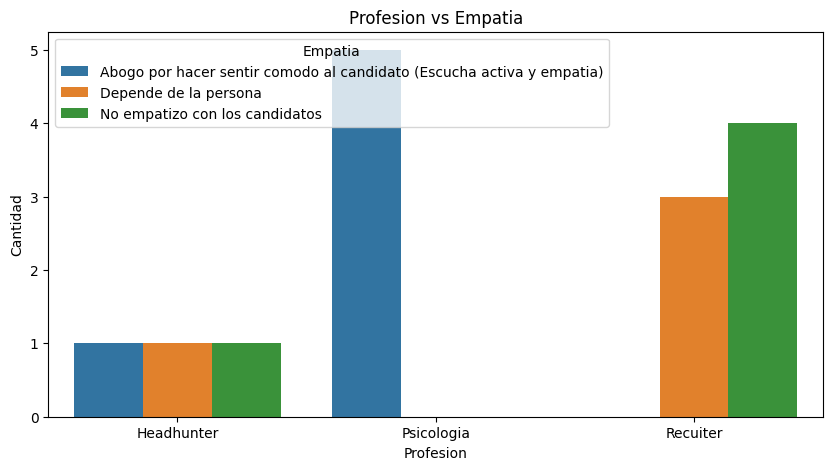

In [20]:
plt.figure(figsize = (10, 5))
a=sns.barplot(y = 'CantxEmp', x = 'Profesion', hue = 'Empatia', data = df_RRHH_P_vs_E).set(xlabel ="Profesion", ylabel = "Cantidad",title="Profesion vs Empatia")

**3er INSIGHT:** <br>
El psicologo es quien tiene mayores herramientas para lidiar con los candidatos. Por eso siempre nos sentimos de general mas comodos en ese tipo de entrevistas. Los reclutadores son mas subjetivos, dado que su tarea es mecanica y repetitiva. Respecto a los headhunter dependen del perfil personal de cada uno y por eso pueden tener una mirada variada dependiendo de su experiencia personal, su objetividad y/o su caracter.

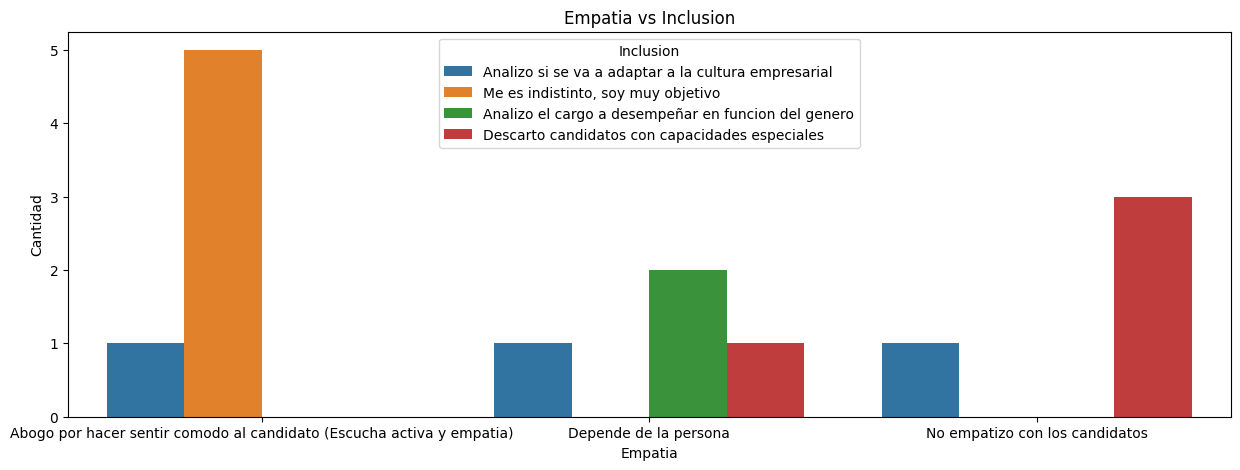

In [21]:
plt.figure(figsize = (15, 5))
a=sns.barplot(y = 'CantxInc', x = 'Empatia', hue = 'Inclusion', data = df_RRHH_E_vs_I).set(xlabel ="Empatia", ylabel = "Cantidad",title="Empatia vs Inclusion")

**4to INSIGHT:** <br>
Es bien conocido que la gente con capacidades especiales y de un contexto que no compatibiliza con la cultura empresarial genera cierta cuota de elitismo. Muchas empresas se jactan de ser inclusivas y de este analisis nos damos cuenta que aun existen ciertos tabues por sobre ser empatico e inclusivo. Siempre por supuesto existen salvedades, pero el mejor destino es para aquellos que son objetivos, desprejuiciados y tienen las mejores herramientas pedagogicas para analizar cada caso puntual.

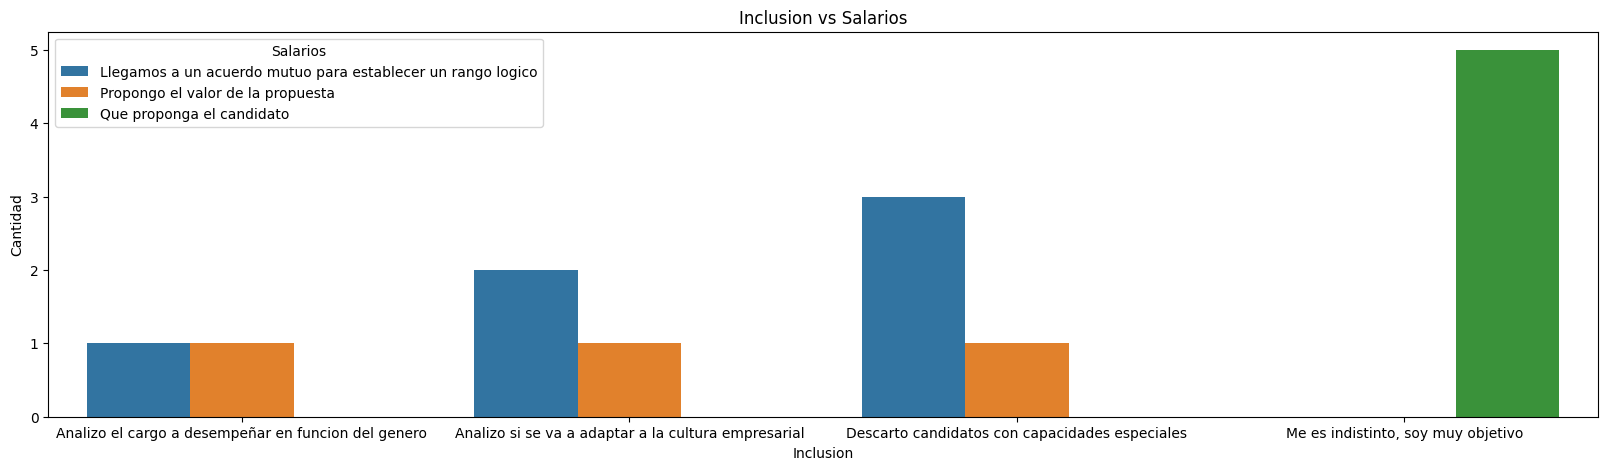

In [22]:
plt.figure(figsize = (20, 5))
a=sns.barplot(y = 'CantxSal', x = 'Inclusion', hue = 'Salarios', data = df_RRHH_I_vs_S).set(xlabel ="Inclusion", ylabel = "Cantidad",title="Inclusion vs Salarios")

**5to INSIGHT:**
Recalquemos que el hecho de ser objetivo tambien abre las puertas a dejar que el candidato haga su propia puesta en escena sobre lo que considera que vale realmente como recurso. Los prejuicios abren siempre espacio a la imposición del cuanto vale una persona o negociar ese valor tratando de llegar a una puesta en comun favorable para el empleador en general.

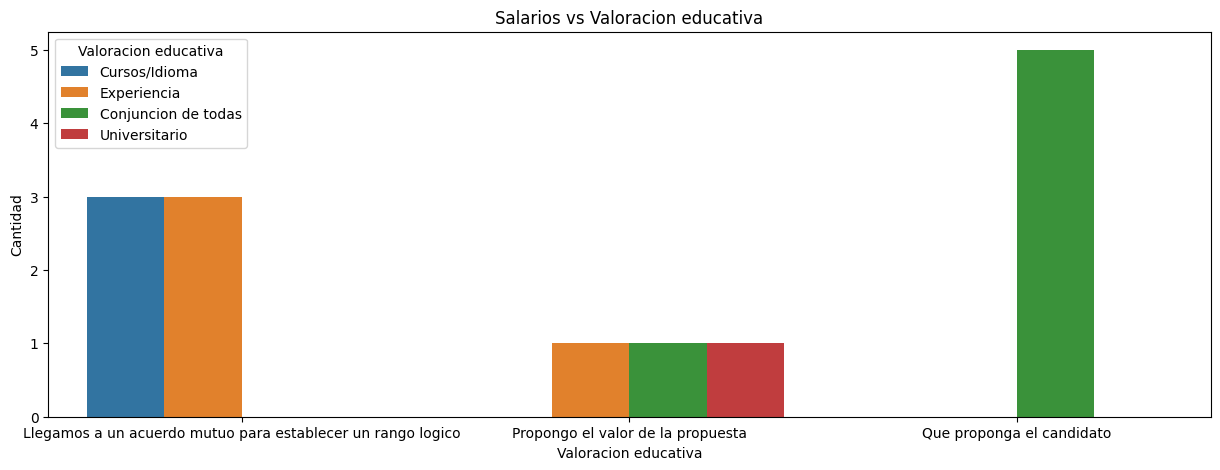

In [23]:
plt.figure(figsize = (15, 5))
a=sns.barplot(y = 'CantxVEd', x = 'Salarios', hue = 'Valoracion educativa', data = df_RRHH_S_vs_VE).set(xlabel ="Valoracion educativa", ylabel = "Cantidad",title="Salarios vs Valoracion educativa")

**6to INSIGHT:** <br>
Cuando se analiza el conjunto de conocimientos del candidato y se apela a la objetividad como anteriormente mensionamos, en general abrimos espacio a que la persona se auto-valore sola y genere confianza. Existen casos donde las empresas ya manejan valores determinados y en menor medida sed fijan en las aptitudes para establecer un rango o valor fijado. 
Respecto al tema de los acuerdos mutuos y las variables presentadas es importante tener en cuenta que en los ultimos años se le ha prestado especial atención a los idiomas y a las especializaciones que muchas carreras formales no ofrecen por razones presupuestarias o de infraestructura.

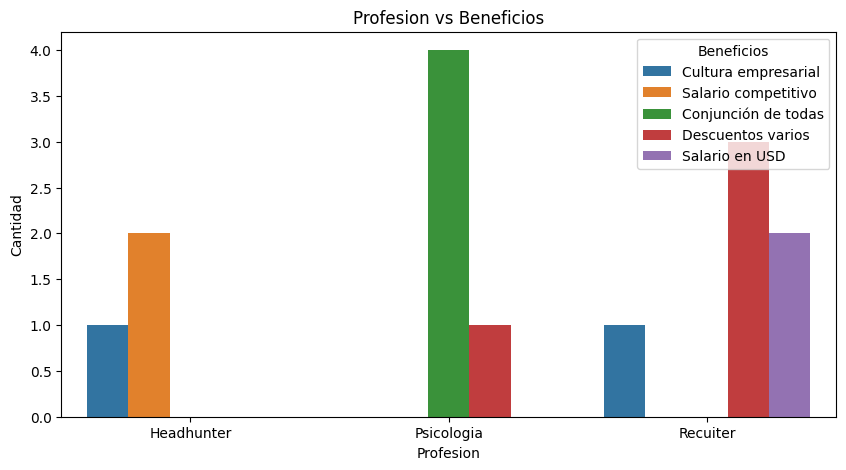

In [24]:
plt.figure(figsize = (10, 5))
a=sns.barplot(y = 'CantxBe', x = 'Profesion', hue = 'Beneficios', data = df_RRHH_P_vs_B).set(xlabel ="Profesion", ylabel = "Cantidad",title="Profesion vs Beneficios")

**7mo INSIGHT:** <br>
Es importante tener en cuenta que a la hora de ofrecer beneficios, dependiendo el perfil quien realiza el contacto con el postulante puede destacar mas unos que otros. El psicologo es el mas generalista dado que recibe un listado de beneficios probistos por la empresa. Los reclutadores remarcan mucho los descuentos, salario en moneda extrdanjera de ser el caso y hacen incapied en la cultura empresarial. Quiza un headhunter es mas objetivo y trata de captar al recurso utilizando como persuación la cultura a la que esta arraigada y al salario dejando en claro que es competitivo y atractivo.

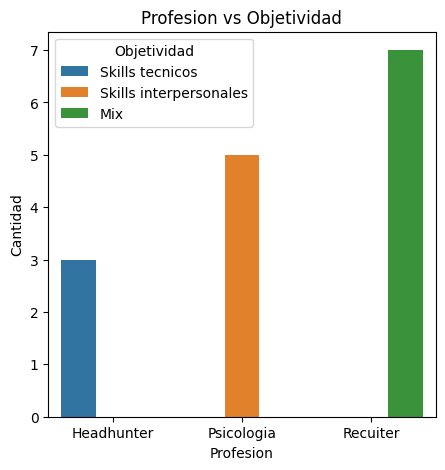

In [25]:
plt.figure(figsize = (5, 5))
a=sns.barplot(y = 'CantxObj', x = 'Profesion', hue = 'Objetividad', data = df_RRHH_P_vs_O).set(xlabel ="Profesion", ylabel = "Cantidad",title="Profesion vs Objetividad")

**8vo INSIGHT:** <br>
No es de extrañar que cada perfil se oriente de forma completamente distinta. El primer filtro siempre es el reclutador, pasando a una segunda instancia (o no) con alguien que tenga un perfil mas humano y pedagogico y finalizando por el headhunter que esta interiorizado edn las cuestiones mas tecnicas de la posición. Esto puede ser variable de igual manera dependiendo de la organización y su estructura en la seleccion de candidatos.

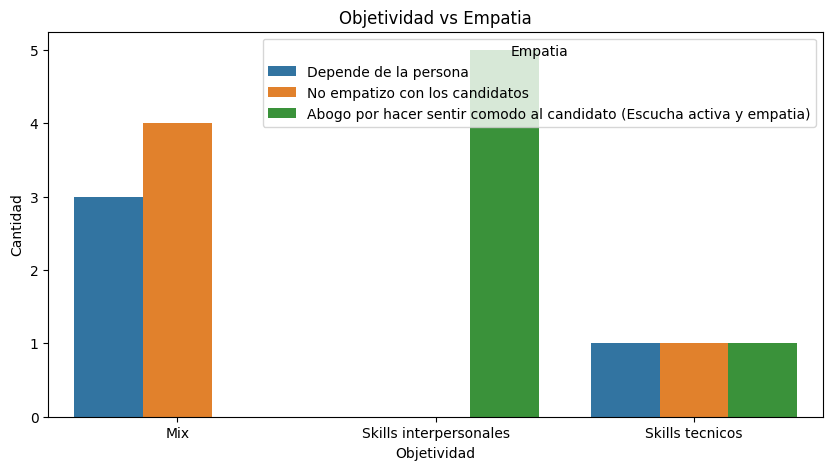

In [26]:
plt.figure(figsize = (10, 5))
a=sns.barplot(y = 'CantxEmp', x = 'Objetividad', hue = 'Empatia', data = df_RRHH_O_vs_E).set(xlabel ="Objetividad", ylabel = "Cantidad",title="Objetividad vs Empatia")

**9no INSIGHT:**<br>
Cuando se trata de skills intrapersonales es necesario tener una buena escucha activa y tratar de ser empatico con el postulante para que no se sienta incomodo o nervioso. Esto no siempre sucede cuando tocamos cuestiones mas hard como los skills tecnicos. Por ultimo tener una mitada mas general dependera de si el reclutado causo o no una buena impresion al margen de tener un skill equilibrado. Influyen factores como la seguridad, la forma de expresarse y saber cuando escuchar a quien realiza la propuesta.

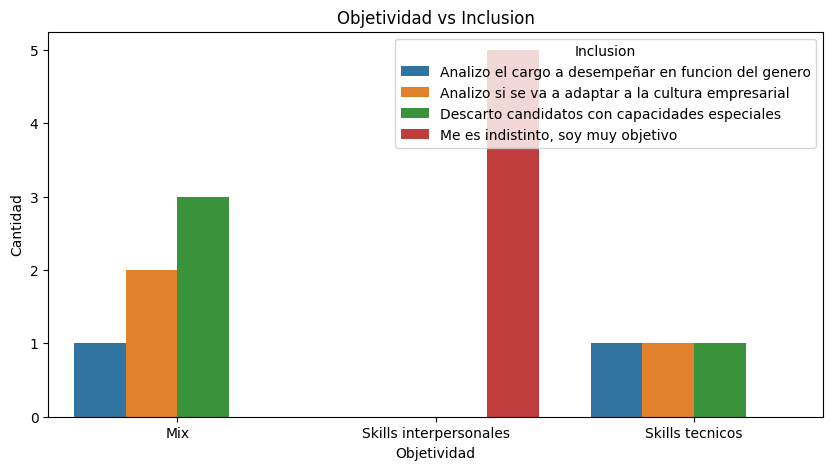

In [27]:
plt.figure(figsize = (10, 5))
a=sns.barplot(y = 'CantxInc', x = 'Objetividad', hue = 'Inclusion', data = df_RRHH_O_vs_I).set(xlabel ="Objetividad", ylabel = "Cantidad",title="Objetividad vs Inclusion")

**10mo INSIGHT:**<br>
Cuando se trata de skills interpresonales siempre se trata de ser objetivo como lo venimos hablando en analisis previos. Respecto al mix y a los skills tecnicos en general depende del criterio del personal de selección ya sea por temas de cultura empresarial, limitantes en la posición o criterios personales respecto a las facultades diferentes de cada individuo.

### ***CONCLUSION***

La busqueda inserción laboral es un juego de ajedrez. Uno tiene que saber mover bien sus fichas para poder ganar la partida. Quiza no es la mejor analogia ya que en un negocio se supone que ambas partes deberian salir beneficiadas, pero el punto es que tanto del lado del postulante como del lado de quien propone una posición existe un juego de poder que se basa en el analisis de mas de una variante. <br>
No basta solo con hacer un click, postular y ya. O tener una entrevista, conversar un rato y ya. Hay toda una estrategia de tras que se deben tener en cuenta de ambas partes para mejorar la eficacia en la comunicación efectiva y el match adecuado para suplir la necesidad clave: poder tentar un recurso valioso y que ese recurso nos elija con seguridad, sin dudar, y que nos siga eligiendo con el tiempo.